# 1.Logistic Regression


- 연속적인 Label data가 아니라 이산적인 Label data 면 어떻게 학습해야 할까?

## 1.0 binary classification
- 2개의 종류로 나뉘어진 데이터를 분류하는 문제입니다. 
- 스팸메일인가 아닌가
- 감자인가 말하는 감자인가
- 정상품인가 불량품인가
- 0 인가 1인가 

## 1.1 Logistic function

- Logistic regression을 진행하기 위해서는 출력 값을 0과 1의 값으로 변경해야 한다. 
- Score 를 0 과 1사이의 값으로 변경하기 위해 `Sigmoid(logistic) function` 을 사용

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

- Logistic regression을 진행할 때 입력 데이터를 $x$, 실제 class 값을 $y$, 예측된 출력 값을 $\hat{y}$라고 하면 $x$는 두가지 변환을 거쳐서 $\hat{y}$가 됩니다. 
$$z = wx + b$$
$$\hat{y} = \sigma(z)$$

### Goal
- $\hat{y}$가 실제 $y$와 가장 가깝게 되도록 하는 $w$와 $b$를 찾는 것 

In [3]:
# !pip install sympy
# !pip install autograd

In [4]:
import sympy
import numpy

from matplotlib import pyplot

In [7]:
z = sympy.Symbol('z', real = True)

logistic = 1/(1+sympy.exp(-z))

In [8]:
logistic

1/(1 + exp(-z))

__참고__
- a = symbols("a", integer = True) #정수
- b = symbols("b", real = True) #실수
- c = symbols("c", complex = True) #복소수
- d = symbols("d", positive = True) #양수
- f, g = symbols("f g", cls = Function) #함수 기호로 정의

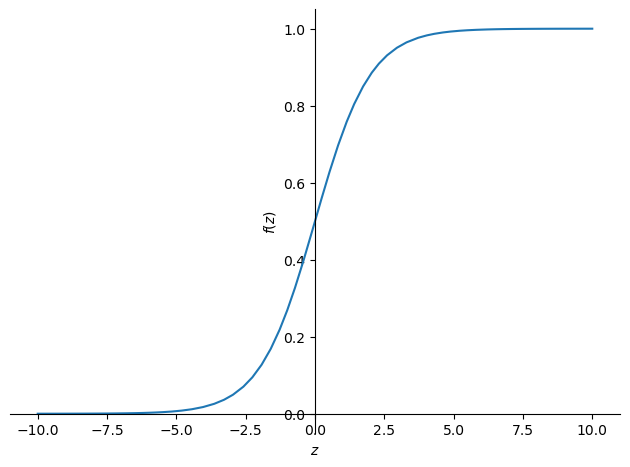

In [9]:
sympy.plotting.plot(logistic)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# noise 를 추가한 Data -> 0.5 를 기준으로 0과 1 로 분류 하여 step function 으로 만들어 보자 
np.random.seed(1234)
x_data = np.linspace(-5, 5, 100)

w_1 = 2
w_0 = 1
z_data = w_1 * x_data + w_0 + np.random.normal(size=len(x_data))

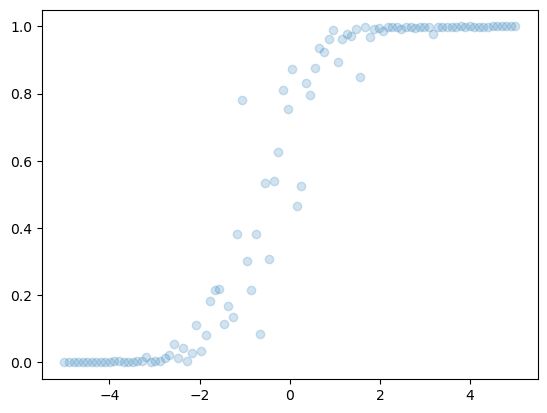

In [14]:
y_data = 1/ (1+np.exp(-z_data))

plt.scatter(x_data, y_data, alpha=0.2)

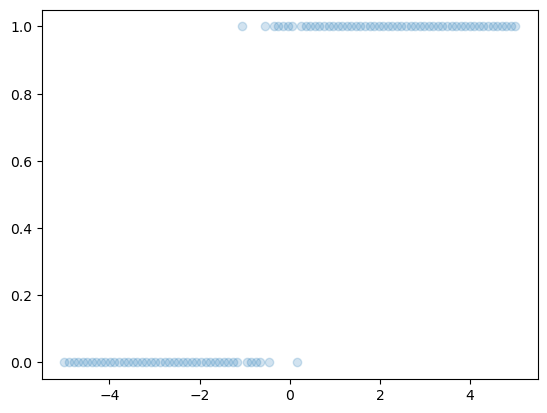

In [16]:
y_data = np.where(y_data >= 0.5 , 1, 0) # 0.5 를 기준으로 1 과 0 으로 분류
pyplot.scatter(x_data, y_data, alpha =0.2)

## 1.2 Logistic loss function
- Predict Data $\hat{y}$과 Label $y$가 가장 가깝게 되도록 하는 $w$와 $b$를 찾는것이 우리의 목표

### Cost Function
- Linear regression -> MSE 
- Logistic regression -> ?

- Logistic regression MSE 를 적용하면 convex 한 형태가 아니다. 

- linear regression에서의 MSE
$$\frac{1}{n} \sum_{i=1}^n (y_i - (wx_i + b))^2$$


- logistic regression에서의 MSE
$$\frac{1}{n} \sum_{i=1}^n (y_i - \sigma(wx_i + b))^2$$

Gradient descent 방식으로 위 cost function의 최솟값을 구하게 되면 어떻게 될까? 
- 중간에 기울기가 0인 지점에서 멈추게 된다.(왜?)

# cost function $L$
- 이진분류 model에서의 cost function은 다음과 같은 함수를 사용한다. 
$$ L = -y \log(a) + (y-1)\log(1-a) $$

- 이제 실제로 차이가 클 때 $L$ 값도 커질까? 
- $y=1$인 경우 $L = -\log(a)$

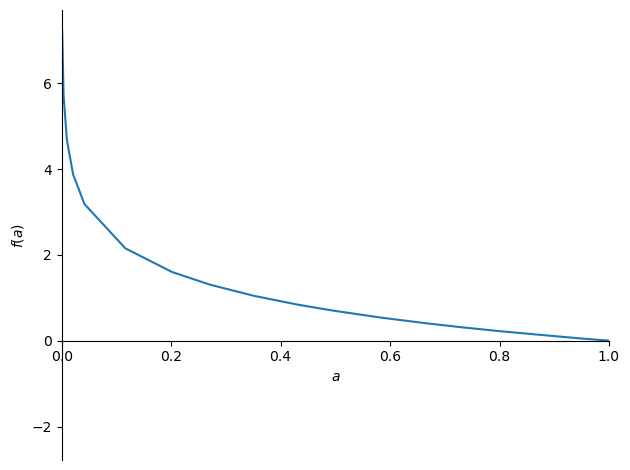

In [18]:
a = sympy.Symbol("a", real = True)
sympy.plotting.plot(-sympy.log(a), xlim = (0, 1))

Label class 가 1일 때 예측 값이 0에 가까워지면 cost function값이 커지고, 1에 가까워지면 cost function이 작아진다.

- $y=0$인 경우 $L = -\log(1-a)$

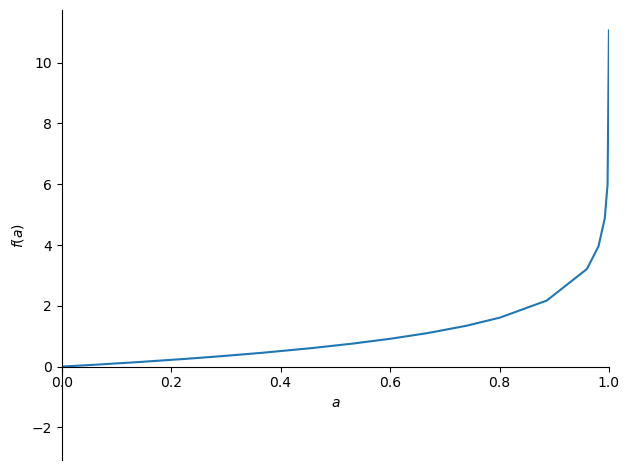

In [20]:
sympy.plotting.plot(-sympy.log(1-a), xlim=(0, 1))

Predict 값이 label값과 가까워지면 cost function값이 작아지고 멀어지면 커지게 된다.

## 1.3 autograd function을 이용해 최적의 parameters 를 찾아보자 
- logistic regression의 전체적인 과정 구현
- Goal : GD 방식을 이용해 w와 b의 최적값을 찾아 내자

In [21]:
logistic

1/(1 + exp(-z))

In [24]:
w_1, w_0, x, y = sympy.symbols("w_1 w_0 x y")
logistic = 1/(1+ sympy.exp(-w_1 * x - w_0 ))

In [25]:
logistic

1/(exp(-w_0 - w_1*x) + 1)

In [26]:
loss = -y * sympy.log(logistic) - (1-y)*sympy.log(1-logistic)
loss

-y*log(1/(exp(-w_0 - w_1*x) + 1)) - (1 - y)*log(1 - 1/(exp(-w_0 - w_1*x) + 1))

- autograd를 통해 미분 구현

In [28]:
!pip install autograd

   ---------------------------------------- 0.0/49.3 kB ? eta -:--:--
   -------- ------------------------------- 10.2/49.3 kB ? eta -:--:--
   ------------------------ --------------- 30.7/49.3 kB 330.3 kB/s eta 0:00:01
   ---------------------------------------- 49.3/49.3 kB 415.0 kB/s eta 0:00:00


In [29]:
# import the autograd-wrapped version of numpy
from autograd import numpy
# import the gradient calculator
from autograd import grad 

In [30]:
def logistic(z):
    return 1 / (1 + numpy.exp(-z))
    
def logistic_model(params, x):
    w = params[0]
    b = params[1]
    z = w * x + b
    y = logistic(z)
    return y

def log_loss(params, model, x, y):
    y_pred = model(params, x)
    return -numpy.mean(y * numpy.log(y_pred) + (1-y) * numpy.log(1 - y_pred))

In [31]:
gradient = grad(log_loss)

In [32]:
type(gradient)

function

- grad 함수는 변수 개수만큼 output을 생성한다. 
- $w_1, w_0$ 2개의 변수가 있습니다. -> 2개의 output

In [35]:
# 랜덤으로 초기화한 변수를 넣어서 기울기를 계산
np.random.seed(1234)
params = np.random.rand(2)
# [w_1, w_0]
print(params)

[0.19151945 0.62210877]


In [36]:
# 2개의 변수에 대해 각각의 기울기를 반환하자!  -> 각각에 대해서 경사하강법을 적용하기 위해서 
gradient(params, logistic_model, x_data, y_data)

array([-0.87894048,  0.09081793])

- 기울기 값이 0에 가까워지면 더이상 반복을 하지 않거나 & max_iter 만큼 반복하기

In [40]:
# 2개의 변수의 기울기가 0 이 될때 까지 반복한다. 
max_iter = 1000
i = 0
# 기울기 초기화
descent = np.ones(len(params))

# 기울기 값이 0에 가까워지면 더이상 반복을 하지 않거나 & max_iter 만큼 반복하기
while np.linalg.norm(descent) > 0.0001 and i < max_iter:
    # 기울기 구하기 
    descent = gradient(params, logistic_model, x_data, y_data)
    params = params - 0.01 * descent   # w = w-a*(de/dw)
    i += 1

print(f"최적화된 w_1 {params[0]}")
print(f"최적화된 w_0 {params[1]}")    

최적화된 w_1 1.9146507496280571
최적화된 w_0 0.7296522814311394


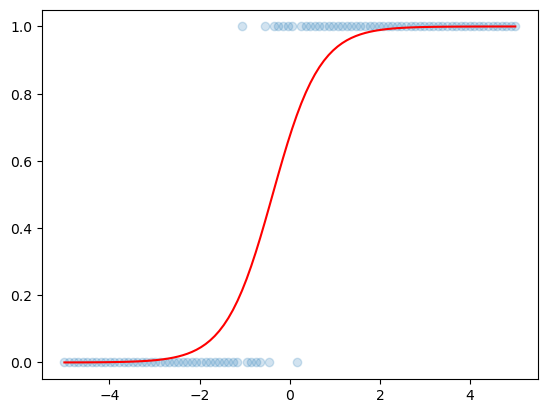

In [43]:
plt.scatter(x_data, y_data, alpha = 0.2)
plt.plot(x_data, logistic_model(params, x_data), '-r')

In [59]:
# 결정경계를 만들어서 분류해 보자
def decision_boundary(y):
    return 1 if y >= .5 else 0
decision_boundary = np.vectorize(decision_boundary) # 함수를 벡터화 시켜서 적용해 준다. 
def classify(pred):
    return decision_boundary(pred).flatten()

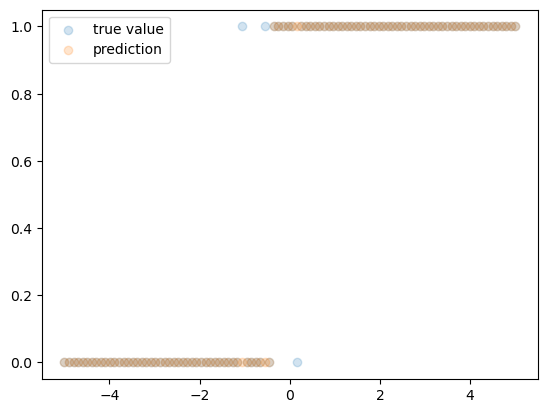

In [63]:
pyplot.scatter(x_data, y_data, alpha = 0.2,
              label =  "true value")
pyplot.scatter(x_data, classify(logistic_model(params, x_data)), label = "prediction", alpha = 0.2)
pyplot.legend()